In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.fft import fft, ifft, fftfreq
import math
import scipy.integrate as integrate
import random

# 1. 

In [100]:
h = math.pi / 30 # шаг
a = 0 # левая граница
b = 1 # правая граница
lam = 1 / 2 # коэфф перед ядром интегрального уравнения
K = lambda x, s: x * s # ядро интегрального уравнения
f = lambda x: np.ones_like(x) # свободный член интегрального уравнения
y_true = lambda x1: np.ones_like(x1) # точное решение интегрального уравнения

In [104]:
# def Quadrature_method(K, f, h, x):
#     n = len(x)
#     wt = 1 / 2
#     wj = 1
#     A = np.zeros((n, n))
#     B = np.zeros((n, 1))
#     for i in range(n):
#         A[i][0] = -h * wt * K(x[i], x[0])

#         for j in range(1, n-1):
#             A[i][j]= -h * wj * K(x[i], x[j])

#         A[i][n-1]= -h * wt * K(x[i], x[n-1])
#         A[i][i]= A[i][i] + 1
#         B[i][0] = f(x[i])
        
#     y = np.linalg.solve(A, B)
#     return y
def Quadrature_method():
    #f = lambda x: 5/6*x
    f = lambda x: np.ones_like(x)
    Lambda = 1/2
    K = lambda x, s: x * s

    h = 0.05
    x1 = np.arange(0, h+1, h).reshape(-1, 1) # Переводим в вектор-столбец
    n = len(x1)

    # Заполнение матрицы X
    X = np.eye(n)  
    for j in range(n):
        weight = 1/2 if j == 0 or j == n-1 else 1 
        for i in range(n):
            X[i, j] -= h * Lambda * weight * K(x1[i][0], x1[j][0])
    Y = f(x1)
    print(Y)
    # Решение системы уравнений
    approx1 = np.linalg.solve(X, Y)
    return x1, approx1

In [105]:
y_true = lambda x1: x1 / x1 # точное решение интегрального уравнения
x = np.arange(a, b, h)
n = len(x)
y_true = np.array(y_true(x)) # точное решение
x_approx, y_approx = Quadrature_method() # найденное решение
print(x_approx)
print(y_approx)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
[[0.  ]
 [0.05]
 [0.1 ]
 [0.15]
 [0.2 ]
 [0.25]
 [0.3 ]
 [0.35]
 [0.4 ]
 [0.45]
 [0.5 ]
 [0.55]
 [0.6 ]
 [0.65]
 [0.7 ]
 [0.75]
 [0.8 ]
 [0.85]
 [0.9 ]
 [0.95]
 [1.  ]]
[[1.        ]
 [1.01500375]
 [1.0300075 ]
 [1.04501125]
 [1.060015  ]
 [1.07501875]
 [1.09002251]
 [1.10502626]
 [1.12003001]
 [1.13503376]
 [1.15003751]
 [1.16504126]
 [1.18004501]
 [1.19504876]
 [1.21005251]
 [1.22505626]
 [1.24006002]
 [1.25506377]
 [1.27006752]
 [1.28507127]
 [1.30007502]]


C:\Users\Ivan K\AppData\Local\Temp\ipykernel_14316\2215818598.py:1: RuntimeWarning: invalid value encountered in divide
  y_true = lambda x1: x1 / x1 # точное решение интегрального уравнения


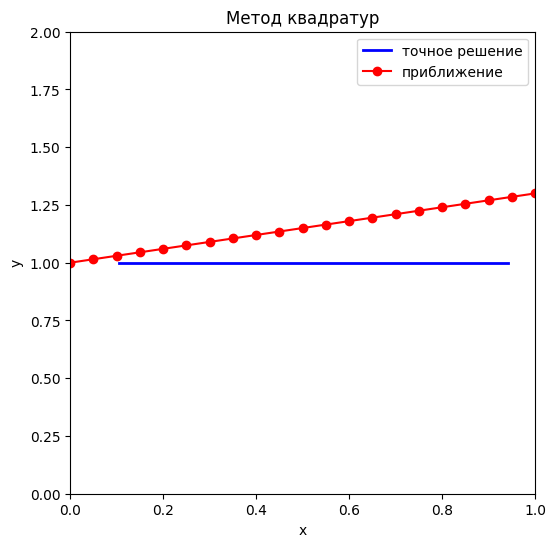

In [107]:
plt.figure(figsize = (6, 6))
plt.plot(x, y_true, '-b', linewidth=2, label='точное решение') # график точного решения
plt.plot(x_approx, y_approx, '-or', label='приближение')
plt.title('Метод квадратур')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.xlim(0, 1)
plt.ylim(0, 2)
plt.show()

# 2.

In [24]:
a = 0 # левая граница
b = 2.0 # правая граница
h = 0.05 # шаг
Lambda = -1

alpha = lambda t: [t**2, t**3, t**4, t**5]
beta = lambda t: [t, 1/2 * t**2, 1/6 * t**3, 1/24 * t**4]
f = lambda t: np.exp(t) - 1
y_exact = lambda t: t / t # точное решение

In [ ]:
def bfun(t, m, f): #интергалы право
    return beta(t)[m] * f(t)

def Aijfun(t, m, k): #вычисление матрицы
    return beta(t)[m] * alpha(t)[k]

def Solve(f,t,Lambda):
    m = len(alpha(0)) # определяем размер alpha+
    M = np.zeros((m, m)) #+
    r = np.zeros((m, 1)) #+
    for i in range(m):
        r[i], _ = integrate.quad(bfun, a, b, args = (i, f))

        for j in range(m):
            res, _ = integrate.quad(Aijfun, a, b, args = (i,j))
            M[i, j] -= Lambda * res

    #for i in range(m):
    #    M[i, i] = M[i, i] + 1

    c = np.linalg.solve(M, r)
    
    return Lambda * (c[0] * alpha(t)[0] + c[1] * alpha(t)[1]) + f(t)

C:\Users\Ivan K\AppData\Local\Temp\ipykernel_14316\3023784603.py:9: RuntimeWarning: invalid value encountered in divide
  y_exact = lambda t: t / t # точное решение


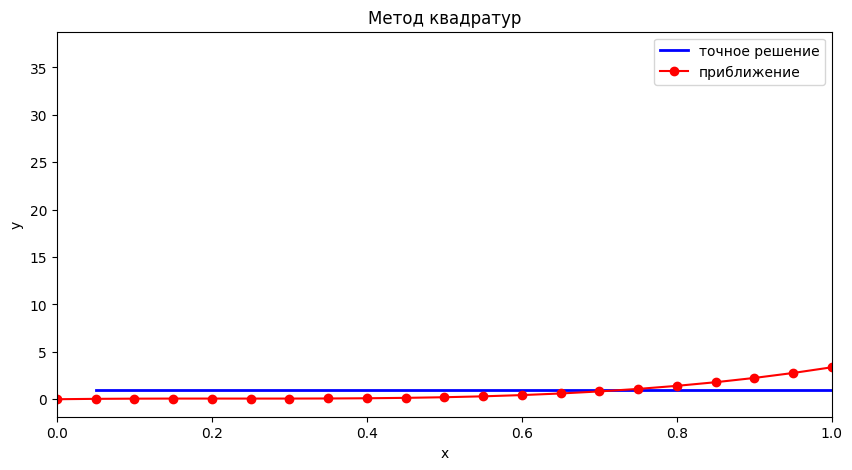

In [37]:
x = np.arange (a, b, h)
n = len(x)
y = np.array(y_exact(x)) # точное решение
y_approx = Solve(f, x, Lambda)
plt.figure(figsize=(10, 5))
plt.plot(x, y, '-b', linewidth=2, label='точное решение') # график точного решения
plt.plot(x, y_approx, '-or', label='приближение') # график найденного решения
plt.title('Метод квадратур')
plt.xlabel('x')
plt.xlim(0, 1)
plt.ylabel('y')
plt.legend()
plt.show()